# Objectives

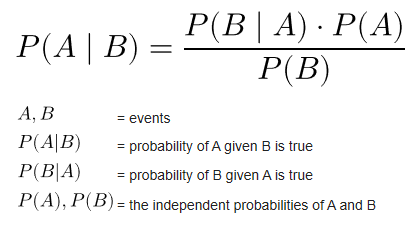

## 2. Prior, Conditional and Posterior probabilities

**Bayes Rule for Classification**

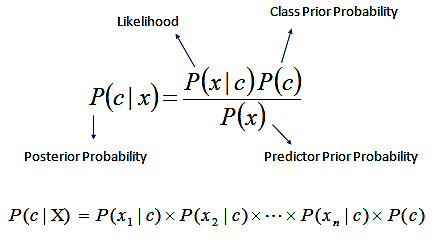

**let's consider the lyrics classification problem that we have this week**

In [2]:
import numpy as np
import pandas as pd
import nltk  
#nltk.download("wordnet")  # only done once! we have to download the WordNet database locally

# very good tokenizer for english, considers sentence structure
from nltk.tokenize import TreebankWordTokenizer 
from nltk.stem import WordNetLemmatizer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from imblearn.over_sampling import SMOTE

In [3]:
# example lyrics corpus

# assuming this is train data
corp = pd.read_csv('../data/music.csv', index_col=0)

corp.head()

,group,song_lines
0,Kaleo,home grounds
1,Kaleo,feels like the weight has been lifted away
2,Kaleo,"but if she leaves me there, i won't run"
3,Kaleo,"please pass it on, carry me down"
4,Kaleo,"all you need to know is i want more, more"


### Step 1: Preprocessing of corpus

In [4]:
#tokenize and lemmatize

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()


#nltk.download('stopwords')

import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   

STOPWORDS = stopwords.words('english')

print(STOPWORDS)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
corp['tokenized'] = corp.song_lines.apply(lambda x: tokenizer.tokenize(str(x)))


In [6]:
corp['lemmatized'] = corp.tokenized.apply(lambda x: " ".join(lemmatizer.lemmatize(token)for token in x) if len(x)>0 else np.nan)
corp = corp.dropna()

### Vectorization

In [7]:
# create labels for classification
groups = list(corp.group)
groups_num = [0 if item == 'Kaleo' else 1 for item in groups]
len(groups)

2409

In [8]:
# instanciation
vectorizer = TfidfVectorizer(stop_words='english')

# fit bag of words model on our corpus
vectors = vectorizer.fit_transform(corp.lemmatized)
corp.lemmatized.info()

corp.to_csv('../data/corp_lemmatized.csv')


<class 'pandas.core.series.Series'>
Index: 2409 entries, 0 to 2600
Series name: lemmatized
Non-Null Count  Dtype 
--------------  ----- 
2409 non-null   object
dtypes: object(1)
memory usage: 37.6+ KB


In [9]:


# for us to see the vectorized labeled data
pd.DataFrame(vectors.todense(), columns=vectorizer.get_feature_names_out(), index=groups_num) # check result of vectorization

,15,17,abbiamo,abilità,acabar,accanto,accarezza,according,ache,acqua,...,yodel,young,youngest,youtube,zattera,zelante,zero,zitti,zitto,él
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 3: Fit Classification NB model

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
modelm = MultinomialNB()

In [12]:
# fit the model with the vectorized data

modelm.fit(vectors, groups)  # model.fit

MultinomialNB()

In [13]:
# multinomialNB usually tends to overfit

modelm.score(vectors, groups)

0.9261104192611042

In [14]:
from sklearn.decomposition import TruncatedSVD

In [15]:
song_pipeline = make_pipeline(
    MultinomialNB(),
)

In [16]:
song_pipeline.fit(vectors, groups)

Pipeline(steps=[('multinomialnb', MultinomialNB())])

In [17]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  Ridge, Lasso, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet

#### For linear models we need to transform labels

In [19]:
models={'RandomForestRegressor': [RandomForestClassifier(), 0],
        'Lasso LinearRegressor': [Lasso(), 0],
        'Ridge LinearRegressor': [RidgeClassifier(), 0],
        'Elastic LinearRegressor': [ElasticNet(), 0],
        'KNeighborsRegressor()': [KNeighborsClassifier(), 0]}


new_vectors = vectorizer.transform(["way down we go"])
new_vectors.todense()

for model in models:
    clf = models[model][0]
    pipe_model = make_pipeline(clf)
    clf.fit(vectors, groups_num)    
    models[model][1] = clf.score(vectors, groups_num)


models

{'RandomForestRegressor': [RandomForestClassifier(), 0.9647156496471565],
 'Lasso LinearRegressor': [Lasso(), 0.0],
 'Ridge LinearRegressor': [RidgeClassifier(), 0.9493565794935658],
 'Elastic LinearRegressor': [ElasticNet(), 0.0],
 'KNeighborsRegressor()': [KNeighborsClassifier(), 0.6218347862183479]}

### Step 4: Use the trained model to predict for new lyrics

In [20]:
# TEST DATA OR NEW Data

new_lyrics = ["sky stars"]

In [21]:
# we have to apply the same steps

# I skipped over the preprocessing 

# used only transform 

new_vectors = vectorizer.transform(new_lyrics)
new_vectors.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [22]:
modelm.predict(new_vectors)

array(['Måneskin'], dtype='<U8')

In [456]:
modelm.predict_proba(new_vectors)

array([[0.24034869, 0.75965131]])

In [24]:
import pickle
model_filename = '../data/model_music.pkl'


pickle.dump(modelm, open(model_filename,'wb'))


In [25]:
testvect = TfidfVectorizer(stop_words='english')

In [26]:
corp_new = pd.read_csv('../data/corp_lemmatized.csv', index_col=0)
corp_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 2600
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   group       2409 non-null   object
 1   song_lines  2409 non-null   object
 2   tokenized   2409 non-null   object
 3   lemmatized  2409 non-null   object
dtypes: object(4)
memory usage: 94.1+ KB


In [27]:
model_filename = '../data/model_music_best.pkl'
model_new1 = pickle.load(open(model_filename,'rb'))
print(model_new1.predict(['way down','stars sky']))

['Kaleo' 'Måneskin']


## References
[StatQuest on Nsive Bayes](https://www.youtube.com/watch?v=O2L2Uv9pdDA)